code is from here: https://heartbeat.fritz.ai/build-train-and-deploy-a-book-recommender-system-using-keras-tensorflow-js-b96944b936a7

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# import tensorflow_recommenders as tfrs

In [2]:
ratings = pd.read_pickle("./Data/top100_longform.pkl")
# ratings = pd.read_pickle("./Data/moderate_users_longform.pkl")
user_stats = pd.read_pickle("./Data/moderate_user_stats.pkl")

In [3]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

100

In [4]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

11189

In [5]:
ratings.head()

,movie_id,rating_score,user_id,user,movie
473,1069,3,23762937,25,826
514,1069,4,16356754,17,826
556,1069,3,14473982,13,826
570,1069,4,25960703,28,826
641,1069,4,29084857,37,826


In [6]:
ratings.groupby('rating_score').count()

,movie_id,user_id,user,movie
rating_score,,,,
1,1886,1886,1886,1886
2,4729,4729,4729,4729
3,14046,14046,14046,14046
4,18624,18624,18624,18624
5,9449,9449,9449,9449


In [ ]:
def center_ratings(ratings_df, users_df):
    ratings_df['centered_rating'] = None
    for row in ratings_df.index:
        mean_val = users_df.at[ratings_df.at[row, 'user_id'], 'mean_score']
        ratings_df.at[row, 'centered_rating'] = ratings_df.at[row, 'rating_score'] - mean_val
        
    return ratings_df

In [ ]:
ratings_centered = center_ratings(ratings, user_stats)

In [7]:

X = ratings[['movie', 'user']].values
y = ratings['rating_score'].values

X.shape, y.shape

((48734, 2), (48734,))

In [10]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.4, random_state=42)

In [11]:
X_train.shape, X_test.shape

((29240, 3), (19494, 3))

In [12]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [52]:
del model

In [13]:
input_movies = keras.layers.Input(shape=[1])
embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
movies_out = keras.layers.Flatten()(embed_movies)

input_users = keras.layers.Input(shape=[1])
embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
users_out = keras.layers.Flatten()(embed_users)

conc_layer = keras.layers.Concatenate()([movies_out, users_out])
x = keras.layers.Dense(128, activation='relu')(conc_layer)

dense2 = x = keras.layers.Dense(128, activation='relu')(x)
dropout = x = keras.layers.Dropout(rate=.2, seed=42)(x)
dense3 = x = keras.layers.Dense(16, activation='relu')(x)
x_out = x = keras.layers.Dense(1, activation='relu')(x)


model = keras.Model([input_movies, input_users], x_out)

In [14]:
opt = tf.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())

# model.summary()

In [15]:
hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=16, epochs=20, verbose=1, validation_split=.2)

Epoch 1/20
1462/1462 [==============================] - 30s 19ms/step - loss: 2.1508 - root_mean_squared_error: 1.3851 - val_loss: 0.8542 - val_root_mean_squared_error: 0.9242
Epoch 2/20
1462/1462 [==============================] - 27s 19ms/step - loss: 0.7663 - root_mean_squared_error: 0.8753 - val_loss: 0.8592 - val_root_mean_squared_error: 0.9270
Epoch 3/20
1462/1462 [==============================] - 23s 16ms/step - loss: 0.6307 - root_mean_squared_error: 0.7940 - val_loss: 0.8320 - val_root_mean_squared_error: 0.9121
Epoch 4/20
1462/1462 [==============================] - 22s 15ms/step - loss: 0.5790 - root_mean_squared_error: 0.7608 - val_loss: 0.8479 - val_root_mean_squared_error: 0.9208
Epoch 5/20
1462/1462 [==============================] - 21s 14ms/step - loss: 0.4993 - root_mean_squared_error: 0.7065 - val_loss: 0.8909 - val_root_mean_squared_error: 0.9439
Epoch 6/20
1462/1462 [==============================] - 27s 18ms/step - loss: 0.4266 - root_mean_squared_error: 0.6531 -

KeyboardInterrupt: 

In [17]:
hist2

NameError: name 'hist2' is not defined

In [31]:
hist2 = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=16, epochs=20, verbose=1, validation_split=.2)

Epoch 1/20
84/84 [==============================] - 2s 24ms/step - loss: 0.4622 - root_mean_squared_error: 0.6798 - val_loss: 2.3408 - val_root_mean_squared_error: 1.5300
Epoch 2/20
84/84 [==============================] - 2s 23ms/step - loss: 0.4820 - root_mean_squared_error: 0.6943 - val_loss: 2.3401 - val_root_mean_squared_error: 1.5297
Epoch 3/20
84/84 [==============================] - 1s 16ms/step - loss: 0.5054 - root_mean_squared_error: 0.7109 - val_loss: 2.3494 - val_root_mean_squared_error: 1.5328
Epoch 4/20
84/84 [==============================] - 1s 17ms/step - loss: 0.4726 - root_mean_squared_error: 0.6874 - val_loss: 2.3435 - val_root_mean_squared_error: 1.5308
Epoch 5/20
84/84 [==============================] - 1s 10ms/step - loss: 0.4470 - root_mean_squared_error: 0.6686 - val_loss: 2.3068 - val_root_mean_squared_error: 1.5188
Epoch 6/20
84/84 [==============================] - 1s 16ms/step - loss: 0.4403 - root_mean_squared_error: 0.6636 - val_loss: 2.2723 - val_root_m

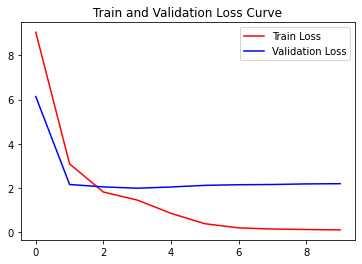

In [15]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

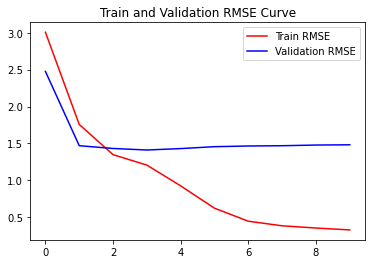

In [16]:
train_loss = hist.history['root_mean_squared_error']
val_loss = hist.history['val_root_mean_squared_error']
plt.plot(train_loss, color='r', label='Train RMSE')
plt.plot(val_loss, color='b', label='Validation RMSE')
plt.title("Train and Validation RMSE Curve")
plt.legend()
plt.show()

In [19]:
opt = tf.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, 
              loss=keras.losses.CosineSimilarity(), 
              metrics = keras.metrics.RootMeanSquaredError())

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 15)        24735       input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        35865       input_4[0][0]                    
____________________________________________________________________________________________

In [20]:
X_train = X_train.astype(float)

In [24]:
hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=64, epochs=50, verbose=1, validation_split=.2)

Epoch 1/50
21/21 [==============================] - 1s 43ms/step - loss: -1.0000 - root_mean_squared_error: 1.4398 - val_loss: -1.0000 - val_root_mean_squared_error: 1.4839
Epoch 2/50
21/21 [==============================] - 0s 21ms/step - loss: -1.0000 - root_mean_squared_error: 1.4559 - val_loss: -1.0000 - val_root_mean_squared_error: 1.4926
Epoch 3/50
21/21 [==============================] - 1s 25ms/step - loss: -1.0000 - root_mean_squared_error: 1.4718 - val_loss: -1.0000 - val_root_mean_squared_error: 1.5005
Epoch 4/50
21/21 [==============================] - 1s 25ms/step - loss: -1.0000 - root_mean_squared_error: 1.4718 - val_loss: -1.0000 - val_root_mean_squared_error: 1.5075
Epoch 5/50
21/21 [==============================] - 1s 25ms/step - loss: -1.0000 - root_mean_squared_error: 1.4756 - val_loss: -1.0000 - val_root_mean_squared_error: 1.5144
Epoch 6/50
21/21 [==============================] - 1s 28ms/step - loss: -1.0000 - root_mean_squared_error: 1.4818 - val_loss: -1.0000 

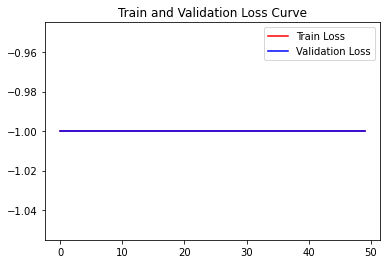

In [25]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

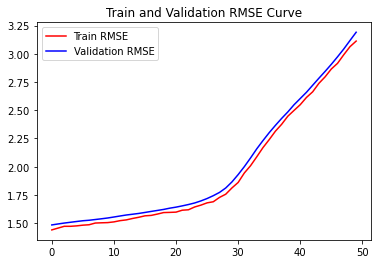

In [26]:
train_loss = hist.history['root_mean_squared_error']
val_loss = hist.history['val_root_mean_squared_error']
plt.plot(train_loss, color='r', label='Train RMSE')
plt.plot(val_loss, color='b', label='Validation RMSE')
plt.title("Train and Validation RMSE Curve")
plt.legend()
plt.show()

In [25]:
ratings.groupby('user_id').count().sort_values(by='movie_id',ascending=False)

,movie_id,rating_score,user,movie
user_id,,,,
31794511,13,13,13,13
29857588,12,12,12,12
70435183,12,12,12,12
79854948,12,12,12,12
97493409,11,11,11,11
...,...,...,...,...
57729959,1,1,1,1
29922095,1,1,1,1
57725780,1,1,1,1


In [26]:
ratings[ratings.user_id==31794511]

,movie_id,rating_score,user_id,user,movie
3012,29767,4,31794511,12024,5869
4058,14782,3,31794511,12024,3397
7505,2112,4,31794511,12024,1487
12027,26319,5,31794511,12024,5287
24369,499,4,31794511,12024,411
26342,20183,1,31794511,12024,3827
39462,795,3,31794511,12024,649
41706,31427,4,31794511,12024,6172
46484,2325,5,31794511,12024,1611
47670,2703,5,31794511,12024,1811


In [63]:
movie_array = ratings[ratings.user_id==31794511].movie.values.astype(int)
user = np.array([int(12024) for n in range(len(movie_array))])

In [64]:
movie_array.shape, movie_array.dtype, user.shape, user.dtype

((13,), dtype('int64'), (13,), dtype('int64'))

In [65]:
pred = model.predict([movie_array, user])

In [66]:
list(zip(zip(pred.flatten(), ratings[ratings.user_id==31794511].rating_score.values),movie_array))

[((4.193902, 4), 5869),
 ((3.948342, 3), 3397),
 ((4.187209, 4), 1487),
 ((4.0150485, 5), 5287),
 ((4.001645, 4), 411),
 ((3.8334882, 1), 3827),
 ((4.482376, 3), 649),
 ((4.212425, 4), 6172),
 ((4.767973, 5), 1611),
 ((4.5517263, 5), 1811),
 ((3.8925762, 4), 2216),
 ((4.089591, 4), 1934),
 ((4.2476206, 2), 2170)]